<a href="https://colab.research.google.com/github/cgrupo12-sudo/numero/blob/main/numero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow tensorflow-datasets matplotlib

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Cargar MNIST
ds, info = tfds.load('mnist',
                     split=['train', 'test'],
                     shuffle_files=True,
                     as_supervised=True,  # devuelve (imagen, etiqueta)
                     with_info=True)

train_ds, test_ds = ds

Entrenamiento: (60000, 28, 28) → 60000 imágenes de 28x28
Prueba: (10000, 28, 28) → 10000 imágenes


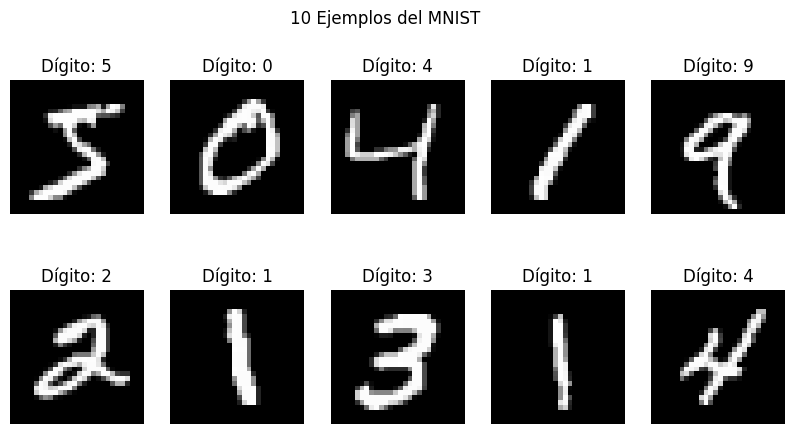

In [4]:
# EJERCICIO 1: Cargar MNIST desde keras y visualizar 10 imágenes
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar dimensiones
print(f"Entrenamiento: {x_train.shape} → {x_train.shape[0]} imágenes de {x_train.shape[1]}x{x_train.shape[2]}")
print(f"Prueba: {x_test.shape} → {x_test.shape[0]} imágenes")

# Visualizar 10 imágenes
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Dígito: {y_train[i]}")
    plt.axis('off')
plt.suptitle("10 Ejemplos del MNIST")
plt.show()

In [6]:
# EJERCICIO 2: Normalización y One-Hot Encoding
from tensorflow.keras.utils import to_categorical

# Normalizar: 0-255 → 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-Hot Encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"y_train original: {y_train[0]} → one-hot: {y_train_cat[0]}")

y_train original: 5 → one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# EJERCICIO 3: SVM con subconjunto de 10,000 imágenes
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Tomar subconjunto
subset_size = 10000
x_train_subset = x_train[:subset_size].reshape(subset_size, -1)
y_train_subset = y_train[:subset_size]

# Entrenar SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
print("Entrenando SVM... (puede tardar ~1-2 min)")
svm.fit(x_train_subset, y_train_subset)

# Predecir en test
x_test_flat = x_test.reshape(len(x_test), -1)
y_pred_svm = svm.predict(x_test_flat)

# Exactitud
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitud SVM: {acc_svm:.4f}")

Entrenando SVM... (puede tardar ~1-2 min)
Exactitud SVM: 0.9594


In [8]:
# EJERCICIO 4: MLP con 784 → 128 → 64 → 10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_mlp.summary()

# Entrenar
history_mlp = model_mlp.fit(x_train, y_train_cat,
                            epochs=10,
                            batch_size=32,
                            validation_data=(x_test, y_test_cat),
                            verbose=1)

# Evaluar
test_loss, test_acc = model_mlp.evaluate(x_test, y_test_cat, verbose=0)
print(f"MLP - Precisión en test: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8779 - loss: 0.4158 - val_accuracy: 0.9447 - val_loss: 0.1686
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9666 - loss: 0.1084 - val_accuracy: 0.9666 - val_loss: 0.1036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9695 - val_loss: 0.0933
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9758 - val_loss: 0.0805
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9743 - val_loss: 0.0871
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9774 - val_loss: 0.0838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0236 - 

In [9]:
# EJERCICIO 5: Probar diferentes configuraciones
from tensorflow.keras.optimizers import SGD, RMSprop

configs = [
    {'neurons': [256, 128], 'optimizer': 'adam'},
    {'neurons': [64, 32], 'optimizer': 'sgd'},
    {'neurons': [128, 64], 'optimizer': RMSprop()}
]

results = []

for i, cfg in enumerate(configs):
    print(f"\n--- Configuración {i+1}: {cfg} ---")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(cfg['neurons'][0], activation='relu'),
        Dense(cfg['neurons'][1], activation='relu'),
        Dense(10, activation='softmax')
    ])

    opt = cfg['optimizer']
    if opt == 'sgd':
        opt = SGD(learning_rate=0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    results.append(val_acc)
    print(f"Validación accuracy: {val_acc:.4f}")

print("\nMejor configuración:", configs[np.argmax(results)])


--- Configuración 1: {'neurons': [256, 128], 'optimizer': 'adam'} ---
Validación accuracy: 0.9772

--- Configuración 2: {'neurons': [64, 32], 'optimizer': 'sgd'} ---
Validación accuracy: 0.9421

--- Configuración 3: {'neurons': [128, 64], 'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x7a353c0e7f50>} ---
Validación accuracy: 0.9756

Mejor configuración: {'neurons': [256, 128], 'optimizer': 'adam'}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9093 - loss: 0.2940 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9886 - val_loss: 0.0357
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9883 - val_loss: 0.0350
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0211 - val_accuracy: 0.9901 - val_loss: 0.0294
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9912 - val_loss: 0.0326
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9915 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0067 

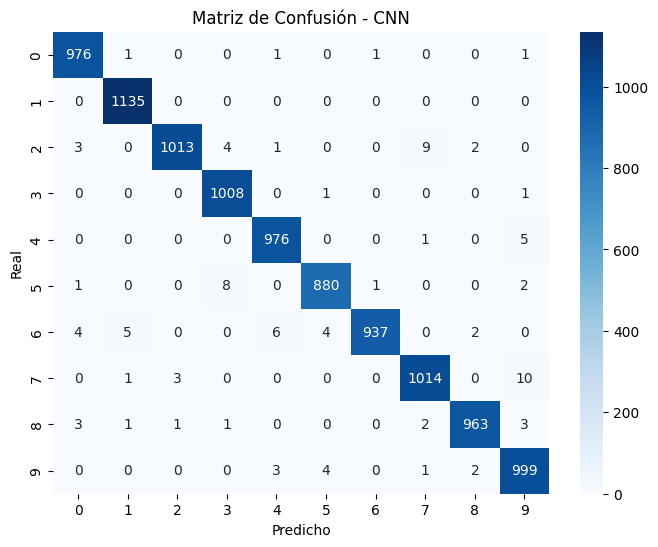

In [10]:
# EJERCICIO 6: CNN con Conv2D + MaxPooling
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Asegurar forma (28,28,1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

# Entrenar
history_cnn = model_cnn.fit(x_train_cnn, y_train_cat,
                            epochs=10,
                            batch_size=32,
                            validation_data=(x_test_cnn, y_test_cat))

# Evaluar
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"CNN - Precisión: {test_acc:.4f}")

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model_cnn.predict(x_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - CNN")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [11]:
# EJERCICIO 7: CNN con Dropout y BatchNorm
from tensorflow.keras.layers import Dropout, BatchNormalization

model_cnn_reg = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_reg = model_cnn_reg.fit(x_train_cnn, y_train_cat,
                                epochs=10,
                                batch_size=32,
                                validation_data=(x_test_cnn, y_test_cat))

# Comparación
acc_before = test_acc
acc_after = history_reg.history['val_accuracy'][-1]
print(f"Antes (sin regularización): {acc_before:.4f}")
print(f"Después (con Dropout+BN): {acc_after:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8736 - loss: 0.4053 - val_accuracy: 0.9822 - val_loss: 0.0578
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9705 - loss: 0.0975 - val_accuracy: 0.9882 - val_loss: 0.0354
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9766 - loss: 0.0740 - val_accuracy: 0.9899 - val_loss: 0.0289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9912 - val_loss: 0.0243
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9912 - val_loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9859 - loss: 0.0442 - val_accuracy: 0.9912 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0475 -

In [12]:
# EJERCICIO 8: ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Entrenar con augmentación
model_aug = model_cnn_reg  # o clonar
history_aug = model_aug.fit(
    datagen.flow(x_train_cnn, y_train_cat, batch_size=32),
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat)
)

print(f"Precisión con augmentación: {history_aug.history['val_accuracy'][-1]:.4f}")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.9418 - loss: 0.2071 - val_accuracy: 0.9936 - val_loss: 0.0195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9648 - loss: 0.1184 - val_accuracy: 0.9928 - val_loss: 0.0211
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9676 - loss: 0.1047 - val_accuracy: 0.9935 - val_loss: 0.0204
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9702 - loss: 0.0979 - val_accuracy: 0.9936 - val_loss: 0.0182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9735 - loss: 0.0912 - val_accuracy: 0.9933 - val_loss: 0.0195
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9734 - loss: 0.0891 - val_accuracy: 0.9944 - val_loss: 0.0179
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9746 - loss: 0.0867 - val_accuracy: 0.9938 - val_loss: 0.0201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9750 - loss: 0.08

In [13]:
# EJERCICIO 9: Classification Report
from sklearn.metrics import classification_report

y_pred_final = np.argmax(model_aug.predict(x_test_cnn), axis=1)
print(classification_report(y_test, y_pred_final, digits=4))

# Dígitos con más errores
errors = cm.diagonal() / cm.sum(axis=1)
worst_digit = np.argmin(errors)
print(f"\nDígito con más errores: {worst_digit} (precisión: {errors[worst_digit]:.4f})")
print("Posibles causas: confusión con 4-9, 3-5, 7-9 por similitud visual.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0     0.9949    0.9990    0.9969       980
           1     0.9947    0.9947    0.9947      1135
           2     0.9961    0.9942    0.9952      1032
           3     0.9911    0.9970    0.9941      1010
           4     0.9980    0.9969    0.9975       982
           5     0.9955    0.9933    0.9944       892
           6     0.9989    0.9906    0.9948       958
           7     0.9884    0.9961    0.9922      1028
           8     0.9949    0.9938    0.9944       974
           9     0.9960    0.9921    0.9940      1009

    accuracy                         0.9948     10000
   macro avg     0.9949    0.9948    0.9948     10000
weighted avg     0.9948    0.9948    0.9948     10000


Dígito con más errores: 6 (precisión: 0.9781)
Posibles causas: confusión con 4-9, 3-5, 7-9 por similitud visual.


In [14]:
# EJERCICIO 10: Guardar modelo
model_aug.save('modelo_mnist.h5')
print("Modelo guardado como 'modelo_mnist.h5'")

# Cargar y probar
from tensorflow.keras.models import load_model
model_loaded = load_model('modelo_mnist.h5')

# Probar en 5 imágenes nuevas
idx = np.random.randint(0, len(x_test), 5)
x_new = x_test_cnn[idx]
y_new = y_test[idx]

pred_new = np.argmax(model_loaded.predict(x_new), axis=1)
print("Predicciones en imágenes nuevas:", pred_new)
print("Reales:                     ", y_new)

Modelo guardado como 'modelo_mnist.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
Predicciones en imágenes nuevas: [9 6 4 7 4]
Reales:                      [9 6 4 7 4]
